## Import modules

In [2]:
# you need to install ase. use "pip install ase".
import cif2prismatic as c2p

## Setup the input files

In [3]:
input_path = "./cell_files/"
input_filename = "ZnO.cif"

## Read input file (uses ase module internally)

In [4]:
unitcell = c2p.load_cif(input_path + input_filename)

Zn2O2
===Space group===
#: 186, symbol: P 63 m c
===Lattice Parameters===
a: 3.2495
b: 3.2495
c: 5.2069
alpha: 90.0
beta: 90.0
gamma: 119.99999999999999
===Atomic sites===
Zn, 	 [-0.0000	1.8761	0.0000]
Zn, 	 [1.6248	0.9381	2.6035]
O, 	 [-0.0000	1.8761	1.7964]
O, 	 [1.6248	0.9381	4.3998]


### (Optional) Check cif file 

In [5]:
###if cif file doesn't work, check your cif file with codes below
###Print out the whole cif file
c2p.check_cif_file(input_path + input_filename)

#------------------------------------------------------------------------------
#$Date: 2017-10-14 23:18:49 +0300 (Sat, 14 Oct 2017) $
#$Revision: 202019 $
#$URL: file:///home/coder/svn-repositories/cod/cif/9/00/88/9008877.cif $
#------------------------------------------------------------------------------
#
# This file is available in the Crystallography Open Database (COD),
# http://www.crystallography.net/. The original data for this entry
# were provided the American Mineralogist Crystal Structure Database,
# http://rruff.geo.arizona.edu/AMS/amcsd.php
#
# The file may be used within the scientific community so long as
# proper attribution is given to the journal article from which the
# data were obtained.
#
data_9008877
loop_
_publ_author_name
'Wyckoff, R. W. G.'
_publ_section_title
;
 Second edition. Interscience Publishers, New York, New York
 Note: wurtzite structure
;
_journal_name_full               'Crystal Structures'
_journal_page_first              85
_journal_page_last 

## Setting the crystallographic orientation of the supercell

In [6]:
# We do not consider 4 indices for hexagonal, only 3 with third one c-axis

# [UVW] real space direction you want to visualize the crystal
zone_axis = [1, 1, 0]
# (hkl) lattice plane you want to be horizontal in the image
upward_direction = [0, 0, 1]

## Generating a transformation matrix

In [7]:
## A function for generating a transformaion matrix
# based on the given two vectors, zone axis and upward direction
transformation_matrix = c2p.get_transform_matrix(zone_axis, upward_direction, unitcell)

=====Transformation matrix======
[[ 0.8660254 -0.5        0.       ]
 [ 0.         0.         1.       ]
 [ 0.5        0.8660254  0.       ]]


## Generation of a huge chunk of the crystal

In [8]:
### To make the final supercell into orthorhombic shape, 
# we need to make a big chunk of the crystal.
# Nx, Ny, Nz numbers are not important. 
# Increase those numbers if you will make big supercell.
# the unit is unit cell
number = 30
Nx, Ny, Nz = [number,number,number]
supercell = unitcell.repeat((Nx, Ny, Nz))

In [9]:
%matplotlib notebook

<IPython.core.display.Javascript object>


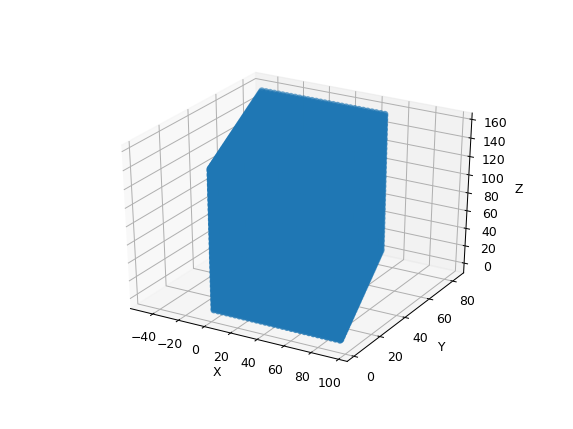

In [10]:
c2p.quick_plot(supercell)

## Rotation of the super cell

In [11]:
## A Function which rotates a supercell by given transformation matrix.
rotated_supercell = c2p.rotate_supercell(supercell, transformation_matrix)

<IPython.core.display.Javascript object>


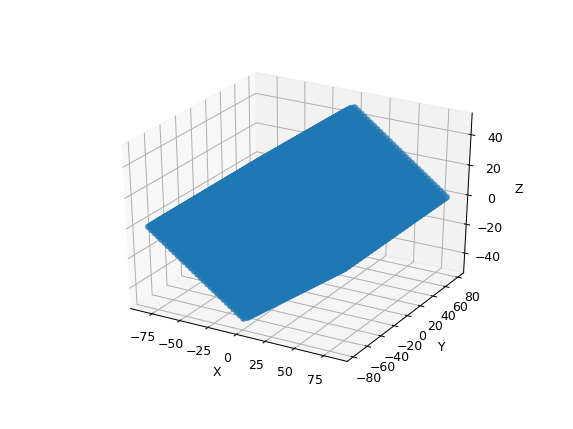

In [12]:
c2p.quick_plot(rotated_supercell)

## Cut the rotated supercell into a box (orthorhombic) shape

In [13]:
## A Function which cut the supercell to given size (box).
final_box = [50, 30, 10] #Final box size in Angstrom
final_supercell, final_box = c2p.cut_to_box(rotated_supercell, final_box)

=====Final box size=====
x: 48.7785828125254
y: 28.637950000000004
z: 9.748483752499993


<IPython.core.display.Javascript object>


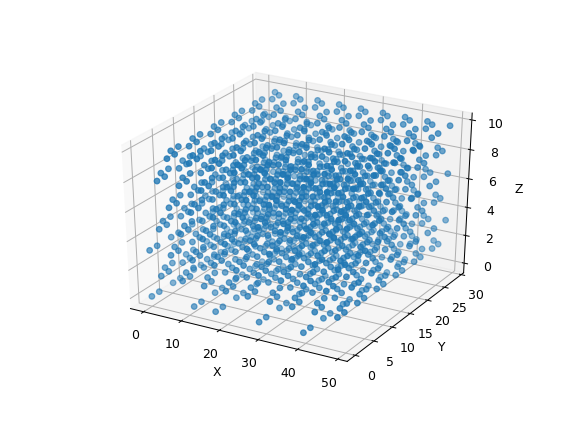

In [14]:
c2p.quick_plot(final_supercell)

## Export to prismatic or xyz format

In [15]:
## Debye-Waller factors - necessary for exporting to prismatitic
DW_dic= {20:0.076, #You need to find and add D-W factors, Z_number: DW_factor
         10:0.6}  #default value is 0.08

In [16]:
#export to prismatic format
c2p.export_prism(final_supercell, input_path, "L12_zno", DW_dic)

#export to xyz format to open in Ovito or Vesta
c2p.export_xyz(final_supercell, input_path, "L12_zno")